#Descriptive Statistics

David Alberto Padrón Sánchez A01663806

In [27]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Semestre7/Customer/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
print("Shape (filas, columnas):", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape (filas, columnas): (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
 df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Eliminamos los TotalCharges nulos

In [29]:
df = df.dropna(subset=['TotalCharges'])

In [30]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

desc = df[num_cols].describe().T
desc['skewness'] = df[num_cols].skew()
desc[['count','mean','std','min','25%','50%','75%','max','skewness']]


,count,mean,std,min,25%,50%,75%,max,skewness
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00,0.237731
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75,-0.222103
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80,0.961642


In [12]:
tenure_mean = df['tenure'].mean()
tenure_median = df['tenure'].median()
tenure_skew = df['tenure'].skew()

def interpretar_skew(sk):
    if sk > 0.5:
        return "asimetría positiva"
    elif sk < -0.5:
        return "asimetría negativa"
    else:
        return "simétrica"

print(f"Tenure: Media: {tenure_mean:.2f}, mediana: {tenure_median:.2f} meses, sesgo: {tenure_skew:.2f} {interpretar_skew(tenure_skew)}.\n")

Tenure: Media: 32.42, mediana: 29.00 meses, sesgo: 0.24 simétrica.



Como la media es mayor que la mediana, la distribución está ligeramente sesgada a la derecha; hay más valores altos que empujan la media.
La mediana de clientes nos especifica que el cliente generalmente se queda con 29 meses de antigüedad.

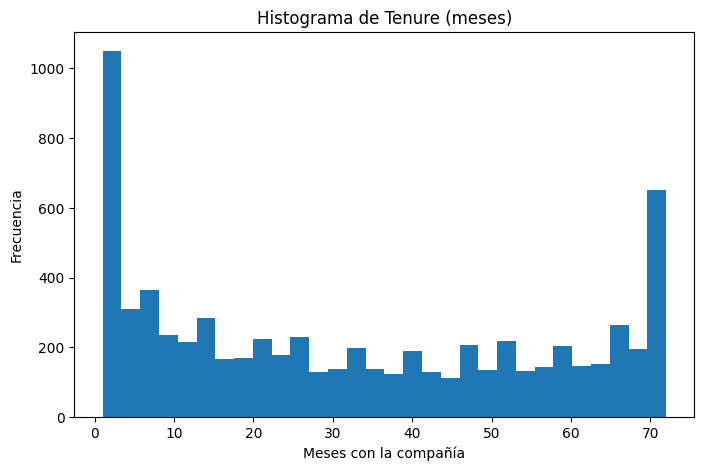

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['tenure'], bins=30)
plt.title('Histograma de Tenure (meses)')
plt.xlabel('Meses con la compañía')
plt.ylabel('Frecuencia')
plt.show()

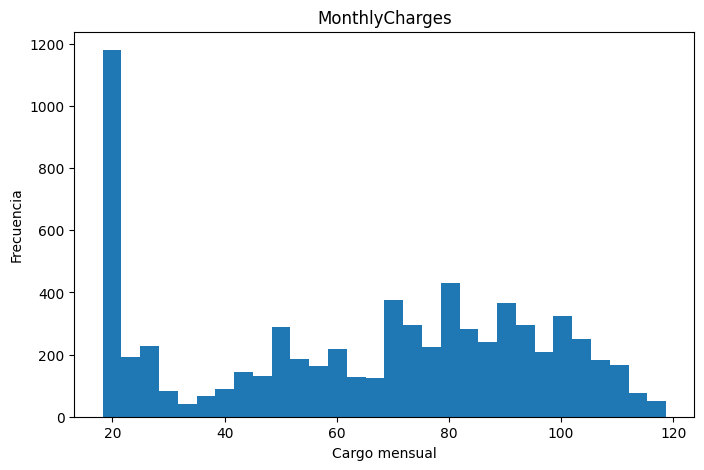

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['MonthlyCharges'], bins=30)
plt.title('MonthlyCharges')
plt.xlabel('Cargo mensual')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
medians = df.groupby('Churn')[['tenure','MonthlyCharges']].median()
print("Medianas:")
print(medians)


Medianas:
       tenure  MonthlyCharges
Churn                        
No       38.0           64.45
Yes      10.0           79.65


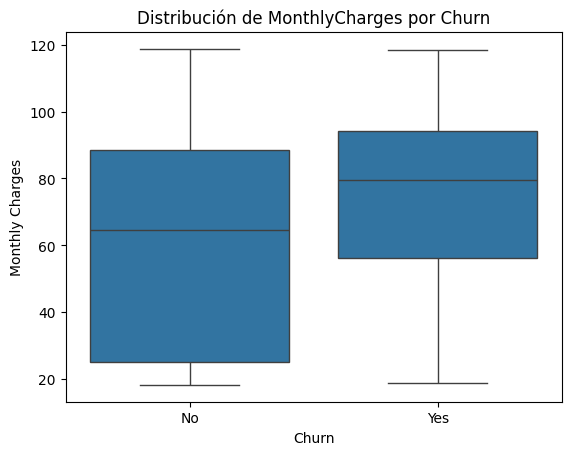

In [26]:
import seaborn as sns
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Distribución de MonthlyCharges por Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

Ahora que conocemos tenure además de los MonthlyCharges con y sin churn nos damos cuenta que los clientes que se van no tiene mucho tiempo que se quedan con la compañía y a su vez tienen los cargos más altos, por lo que los clientes más leales son los que sus cargos son los más bajos.